In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.drop('Serial No.', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit'},inplace=True)

# Data visualisation

In [9]:
style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2']

In [10]:
style.use('seaborn-dark-palette')
style.use('seaborn-whitegrid')

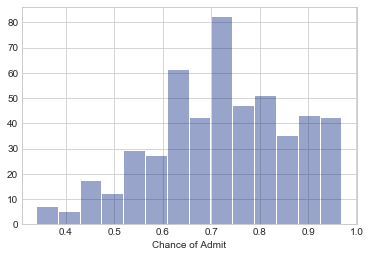

In [11]:
sns.distplot(df['Chance of Admit'], kde=False,hist_kws={'rwidth':0.95})

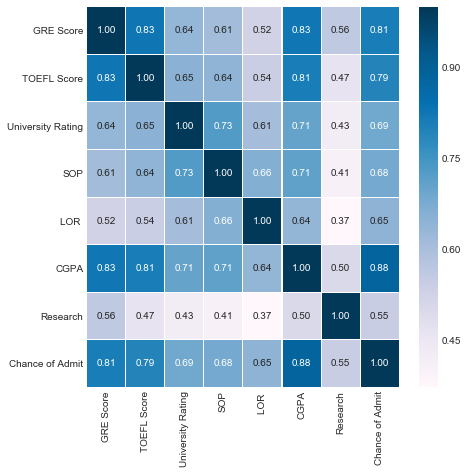

In [12]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),linewidths=0.01, annot=True,fmt='.2f',cmap="PuBu")

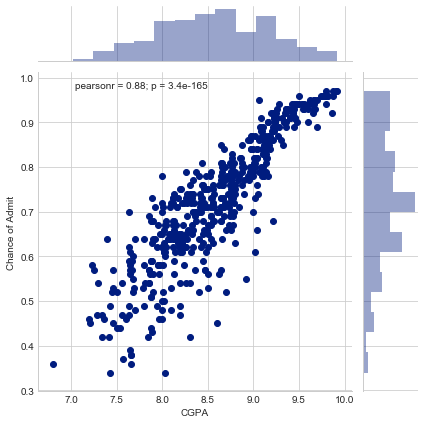

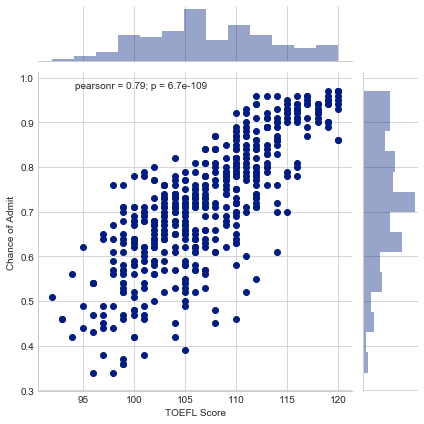

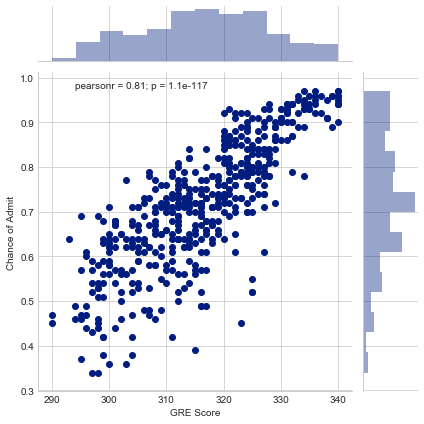

In [13]:
sns.jointplot(df['CGPA'],df['Chance of Admit'],size=6)
sns.jointplot(df['TOEFL Score'],df['Chance of Admit'],size=6)
sns.jointplot(df['GRE Score'],df['Chance of Admit'],size=6)

# Data preparation

In [14]:
y = df['Chance of Admit']
X = df.drop('Chance of Admit',axis=1)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [17]:
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

/Users/Ja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Ja/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/Ja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

# Regression models comparison

Linear regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [19]:
linmodel = LinearRegression()

In [20]:
linmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
y_pred = linmodel.predict(X_test)

In [22]:
r2_score(y_test,y_pred)

0.8531038751652062

Text(0,0.5,'y predicted')

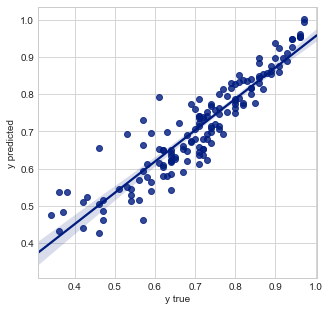

In [23]:
f, ax = plt.subplots(figsize=(5, 5))
sns.regplot(y_test, y_pred)
plt.xlabel('y true')
plt.ylabel('y predicted')

Polynomial regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [25]:
poly = PolynomialFeatures(2)

In [26]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [27]:
linmodel_poly = Ridge(alpha=.7)

In [28]:
linmodel_poly.fit(X_train_poly, y_train)

Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
y_pred_poly = linmodel_poly.predict(X_test_poly)

In [30]:
r2_score(y_test,y_pred_poly)

0.841447791255804

Text(0,0.5,'y predicted')

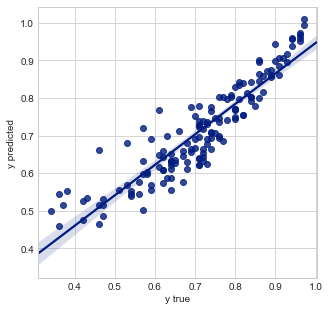

In [31]:
f, ax = plt.subplots(figsize=(5, 5))
sns.regplot(y_test, y_pred_poly)
plt.xlabel('y true')
plt.ylabel('y predicted')

Random forest regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rfmodel = RandomForestRegressor(n_estimators=40)

In [34]:
rfmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [35]:
y_pred_rf = rfmodel.predict(X_test)

In [36]:
r2_score(y_test,y_pred_rf)

0.8335833534044024

Text(0,0.5,'y predicted')

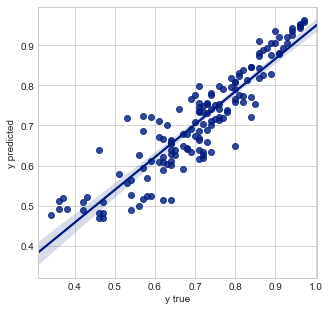

In [37]:
f, ax = plt.subplots(figsize=(5, 5))
sns.regplot(y_test, y_pred_rf)
plt.xlabel('y true')
plt.ylabel('y predicted')

Comparison of Regression models

In [38]:
print('Linear regression R2 score:{}'.format(r2_score(y_test,y_pred)))
print('Polynomial regression R2 score:{}'.format(r2_score(y_test,y_pred_poly)))
print('Random forest regression R2 score:{}'.format(r2_score(y_test,y_pred_rf)))

Linear regression R2 score:0.8531038751652062
Polynomial regression R2 score:0.841447791255804
Random forest regression R2 score:0.8335833534044024


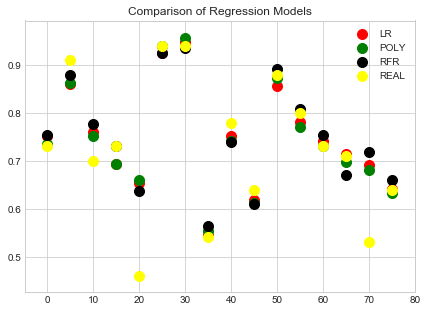

In [39]:
f, ax = plt.subplots(figsize=(7, 5))
red = plt.scatter(np.arange(0,80,5),y_pred[0:80:5],color = "red",s=100)
green = plt.scatter(np.arange(0,80,5),y_pred_poly[0:80:5],color = "green",s=100)
black = plt.scatter(np.arange(0,80,5),y_pred_rf[0:80:5],color = "black",s=100)
yellow = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "yellow",s=100)
plt.title('Comparison of Regression Models')
plt.legend((red,green,black,yellow),('LR', 'POLY', 'RFR', 'REAL'))

# Classification models

In [40]:
def to_categorical(y_values, threshold=0.7):
    for i in y_values.index:
        if y_values[i] >= threshold:
            y_values[i] = 1
        else:
            y_values[i] = 0    

In [41]:
to_categorical(y_train, 0.75)

In [42]:
to_categorical(y_test, 0.75)

Logisitc regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score, f1_score, roc_auc_score, precision_recall_curve, accuracy_score, average_precision_score, roc_curve, roc_auc_score

In [44]:
def C_choose_table(X_train, y_train, X_cv, y_cv, C_param_range = [0.001,0.01,0.1, 1]):
    
    acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy','Recall','f1','ROC AUC'])
    acc_table['C_parameter'] = C_param_range
    
    j=0
    
    for i in C_param_range:
        logmodel = LogisticRegression(C=i, class_weight='balanced')
        logmodel.fit(X_train,y_train)
        predictions_cv = logmodel.predict(X_cv)
        y_pred_prob_cv = logmodel.predict_proba(X_cv)[:,1]
        acc_table.iloc[j,1] = accuracy_score(y_cv,predictions_cv)
        acc_table.iloc[j,2] = recall_score(y_cv,predictions_cv)
        acc_table.iloc[j,3] = f1_score(y_cv,predictions_cv)
        acc_table.iloc[j,4] = roc_auc_score(y_cv,y_pred_prob_cv)
        j += 1
    return acc_table

In [45]:
#X_test and y_test are now validation sets, not test sets, however I'll leave the name unchanged

C_choose_table(X_train, y_train, X_cv = X_test, y_cv=y_test, C_param_range = [0.0001, 0.001,0.01,0.1,1,10,100])

,C_parameter,Accuracy,Recall,f1,ROC AUC
0,0.0001,0.393333,1,0.564593,0.925871
1,0.0010,0.4,1,0.567308,0.922704
2,0.0100,0.613333,1,0.670455,0.91097
3,0.1000,0.773333,0.898305,0.757143,0.922704
4,1.0000,0.853333,0.915254,0.830769,0.961632
5,10.0000,0.88,0.932203,0.859375,0.971876
6,100.0000,0.886667,0.932203,0.866142,0.972807


In [46]:
#the best results are for C=100, hence:

logmodel = LogisticRegression(C=100, class_weight='balanced')
logmodel.fit(X_train,y_train)

LogisticRegression(C=100, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [47]:
def plot_ROC(trained_model, X_test, y_test):
    
    y_pred_prob = trained_model.predict_proba(X_test)[:,1]
    fpr, tpr,_=roc_curve(y_test, y_pred_prob,drop_intermediate=False)
    
    plt.figure()
    plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()
    
    return roc_auc_score(y_test, y_pred_prob)

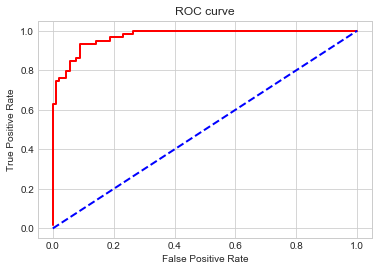

0.9728068541627864

In [48]:
plot_ROC(logmodel, X_test, y_test)

In [49]:
#We can also choose the decision threshold:

In [50]:
def plot_precision_recall_threshold(trained_model):
    
    y_pred_prob = logmodel.predict_proba(X_test)[:,1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)
   
    plt.figure(figsize=(8, 6))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

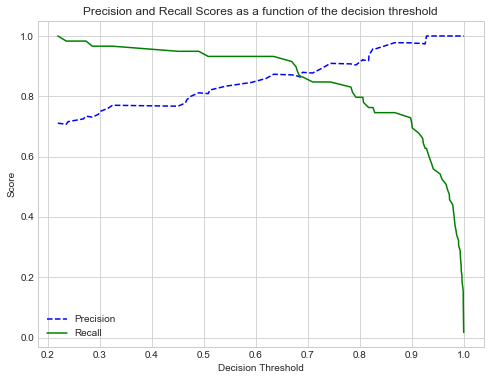

In [51]:
plot_precision_recall_threshold(logmodel)

KNN

In [52]:
from sklearn.neighbors  import KNeighborsClassifier

In [53]:
def choose_n_value(X_train, y_tran, X_cv, y_cv, start=2, end=10, step=1):
    for n in range(start, end, step):    
        knn_model = KNeighborsClassifier(n_neighbors=n)
        knn_model.fit(X_train, y_train)
        knn_predictions = knn_model.predict(X_test)

        print("Number of neighbors is: {}".format(n))
        print("Test set accuracy is: {}".format(accuracy_score(y_test, knn_predictions)))
        print("Test set F1 score is: {}".format(f1_score(y_test, knn_predictions)))
        print()


In [54]:
choose_n_value(X_train, y_train, X_test, y_test,start=4, end=15)

Number of neighbors is: 4
Test set accuracy is: 0.8533333333333334
Test set F1 score is: 0.8070175438596492

Number of neighbors is: 5
Test set accuracy is: 0.8466666666666667
Test set F1 score is: 0.8159999999999998

Number of neighbors is: 6
Test set accuracy is: 0.8333333333333334
Test set F1 score is: 0.7933884297520662

Number of neighbors is: 7
Test set accuracy is: 0.8466666666666667
Test set F1 score is: 0.8188976377952756

Number of neighbors is: 8
Test set accuracy is: 0.8666666666666667
Test set F1 score is: 0.8360655737704918

Number of neighbors is: 9
Test set accuracy is: 0.8733333333333333
Test set F1 score is: 0.8503937007874015

Number of neighbors is: 10
Test set accuracy is: 0.88
Test set F1 score is: 0.8524590163934426

Number of neighbors is: 11
Test set accuracy is: 0.86
Test set F1 score is: 0.8346456692913385

Number of neighbors is: 12
Test set accuracy is: 0.8666666666666667
Test set F1 score is: 0.8360655737704918

Number of neighbors is: 13
Test set accuracy

In [55]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

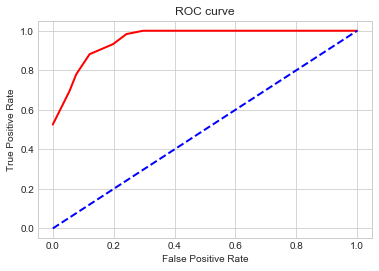

0.9558577016204135

In [56]:
plot_ROC(knn_model, X_test, y_test)

Neural Network

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

/Users/Ja/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [58]:
model = Sequential() #10 i 6
model.add(Dense(10, input_dim=7, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Train on 350 samples, validate on 150 samples
Epoch 1/100
350/350 [==============================] - 1s 3ms/step - loss: 0.6927 - acc: 0.5429 - val_loss: 0.6770 - val_acc: 0.6800
Epoch 2/100
350/350 [==============================] - 0s 225us/step - loss: 0.6683 - acc: 0.6714 - val_loss: 0.6651 - val_acc: 0.6800
Epoch 3/100
350/350 [==============================] - 0s 224us/step - loss: 0.6494 - acc: 0.6886 - val_loss: 0.6535 - val_acc: 0.6867
Epoch 4/100
350/350 [==============================] - 0s 227us/step - loss: 0.6243 - acc: 0.7571 - val_loss: 0.6328 - val_acc: 0.7000
Epoch 5/100
350/350 [==============================] - 0s 222us/step - loss: 0.5929 - acc: 0.7743 - val_loss: 0.6106 - val_acc: 0.6867
Epoch 6/100
350/350 [==============================] - 0s 216us/step - loss: 0.5654 - acc: 0.7743 - val_loss: 0.5917 - val_acc: 0.7000
Epoch 7/100
350/350 [==============================] - 0s 223us/step - loss: 0.5440 - acc: 0.7800 - val_loss: 0.5748 - val_acc: 0.7000
Epoch 8/100

Epoch 61/100
350/350 [==============================] - 0s 220us/step - loss: 0.2637 - acc: 0.8800 - val_loss: 0.2207 - val_acc: 0.9000
Epoch 62/100
350/350 [==============================] - 0s 213us/step - loss: 0.2686 - acc: 0.8771 - val_loss: 0.2260 - val_acc: 0.8733
Epoch 63/100
350/350 [==============================] - 0s 213us/step - loss: 0.2663 - acc: 0.8800 - val_loss: 0.2295 - val_acc: 0.8800
Epoch 64/100
350/350 [==============================] - 0s 214us/step - loss: 0.2581 - acc: 0.8800 - val_loss: 0.2217 - val_acc: 0.8800
Epoch 65/100
350/350 [==============================] - 0s 215us/step - loss: 0.2576 - acc: 0.8857 - val_loss: 0.2250 - val_acc: 0.8667
Epoch 66/100
350/350 [==============================] - 0s 213us/step - loss: 0.2580 - acc: 0.8743 - val_loss: 0.2259 - val_acc: 0.8667
Epoch 67/100
350/350 [==============================] - 0s 213us/step - loss: 0.2568 - acc: 0.8886 - val_loss: 0.2252 - val_acc: 0.8667
Epoch 68/100
350/350 [==========================

In [61]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


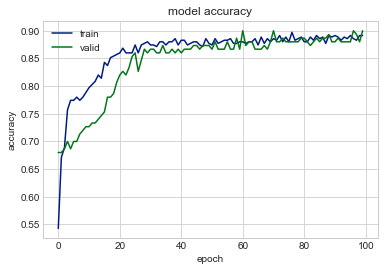

In [62]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

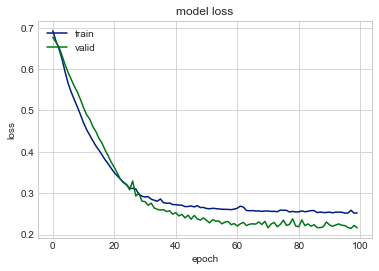

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [64]:
def plot_ROC_keras(trained_model, X_test, y_test):
    
    y_pred_prob = trained_model.predict_proba(X_test)
    fpr, tpr,_=roc_curve(y_test, y_pred_prob,drop_intermediate=False)
    
    plt.figure()
    plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()
    
    return roc_auc_score(y_test, y_pred_prob)

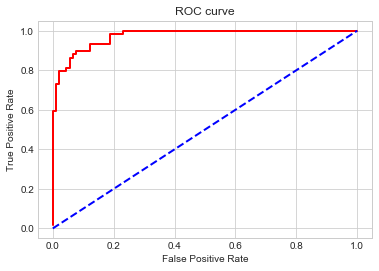

0.9735518718569565

In [65]:
plot_ROC_keras(model, X_test, y_test)

Comparison of classification models

In [66]:
comparison_table = pd.DataFrame(columns = ['Logisitc Regression', 'KNN','Neural Network'], index=['accuracy', 'recall', 'f1 score','ROC AUC score'])

comparison_table.iloc[0,0] = float('%.2f' % accuracy_score(y_test,logmodel.predict(X_test)))
comparison_table.iloc[0,1] = float('%.2f' % accuracy_score(y_test,knn_model.predict(X_test)))
comparison_table.iloc[0,2] = float('%.2f' % accuracy_score(y_test,model.predict_classes(X_test)))

comparison_table.iloc[1,0] = float('%.2f' % recall_score(y_test,logmodel.predict(X_test)))
comparison_table.iloc[1,1] = float('%.2f' % recall_score(y_test,knn_model.predict(X_test)))
comparison_table.iloc[1,2] = float('%.2f' % recall_score(y_test,model.predict_classes(X_test)))

comparison_table.iloc[2,0] = float('%.2f' % f1_score(y_test,logmodel.predict(X_test)))
comparison_table.iloc[2,1] = float('%.2f' % f1_score(y_test,knn_model.predict(X_test)))
comparison_table.iloc[2,2] = float('%.2f' % f1_score(y_test,model.predict_classes(X_test)))

comparison_table.iloc[3,0] = float('%.2f' % roc_auc_score(y_test,logmodel.predict(X_test)))
comparison_table.iloc[3,1] = float('%.2f' % roc_auc_score(y_test,knn_model.predict(X_test)))
comparison_table.iloc[3,2] = float('%.2f' % roc_auc_score(y_test,model.predict_classes(X_test)))

In [67]:
def highlight_max(s):

    is_max = s == s.max()
    return ['background-color: springgreen' if v else '' for v in is_max]

In [68]:
comparison_table.style.apply(highlight_max, axis=1)

,Logisitc Regression,KNN,Neural Network
accuracy,0.89,0.88,0.9
recall,0.93,0.88,0.93
f1 score,0.87,0.85,0.88
ROC AUC score,0.89,0.88,0.91
